In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
d1 = pd.read_csv("/data/flabel12.csv")
d2 = pd.read_csv("/data/dataairport1.csv")
d3 = pd.read_csv("/data/datachruch1.csv")
d4 = pd.read_csv("/data/datahospital1.csv")
d5 = pd.read_csv("/data/datarestaurant.csv")
d6 = pd.read_csv("/data/datazoo1.csv")

In [3]:
data = pd.concat([d1,d3,d4,d5,d6])
data.shape


(131625, 5)

In [4]:
data.drop_duplicates(subset=['Tweet'], inplace = True)
print("No of Unique tweets: ", data['Tweet'].count())

No of Unique tweets:  129715


In [5]:
import nltk
import re, string
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword = stopwords.words('english')
print("Stopwords:",stopword)

Stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
def clean(text):
    text = text.lower() # lower case
    text = re.sub(r'https?://\S+|www\.\S+', " ", text)#URL
    text = re.sub(r'@\w+',' ',text) # mentions
    text = re.sub(r'#\w+', ' ', text) #hashtags
    text= re.sub(r'[^\w\s]',' ',text) #punctuations
    text= re.sub(r'\d+', ' ', text) #digits
    text = re.sub('\[.*?\]',' ', text) #any punctuations left
    text = re.sub("[^a-z0-9]"," ", text)# any others charcters other than numbers and letters
    text = text.split() #stopwords
    text = " ".join([word for word in text if not word in stopword])
    return text

In [7]:
data['Tweet'] = data['Tweet'].astype(str).apply(lambda x: clean(x))
data['Tweet'].sample(5)

59203                                               landed
5400                                    drinking stone ipa
87951    may th star wars day us anniversary rd anniver...
371                                      factory towson md
1279                                  purring like panther
Name: Tweet, dtype: object

In [8]:
max_len = len(max(data['Tweet'], key=len))
print("Maximum length of Tweet:",max_len)

Maximum length of Tweet: 276


In [9]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [10]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
def lemmatize_tweets(tweets):
    temp = ""
    for w in tokenizer.tokenize(tweets):
      temp = temp + lemmatizer.lemmatize(w) +" " 
    return temp
data['Tweet'] = data['Tweet'].apply(lambda x: lemmatize_tweets(x))

In [11]:
from nltk.stem.porter import PorterStemmer
stemmer= PorterStemmer()

def stem_tweets(tweets):
    temp = ""
    for w in tokenizer.tokenize(tweets):
      temp = temp + stemmer.stem(w) +" " 
    return temp
data['Tweet'] = data['Tweet'].apply(lambda x: stem_tweets(x))

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [13]:
x = data['Tweet']
y = data['Label']

In [14]:
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size = 0.2, random_state=42)

In [15]:
train_X.shape

(103772,)

In [16]:
encoder = LabelEncoder()
train_Y = encoder.fit_transform(train_Y)
test_Y = encoder.fit_transform(test_Y)

In [17]:
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)

lr = LogisticRegression(penalty="l2",multi_class = "multinomial",solver = "saga", C=1, max_iter=5000)
lr.fit(train_X_cv,train_Y)
lr_pred = lr.predict(test_X_cv)
print("LR CV Accuracy Score -> ",accuracy_score(lr_pred,test_Y)*100)

LR CV Accuracy Score ->  83.2748718344062


0.8013290353256048
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      8860
           1       0.79      0.89      0.84      7939
           2       0.75      0.74      0.75      3617
           3       0.85      0.78      0.81      3574
           4       0.82      0.63      0.71      1953

    accuracy                           0.83     25943
   macro avg       0.82      0.79      0.80     25943
weighted avg       0.83      0.83      0.83     25943



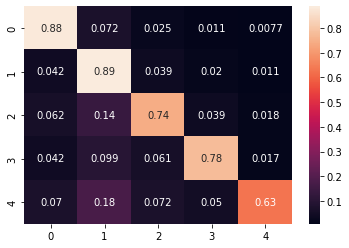

In [18]:
lr_cm = confusion_matrix(test_Y, lr_pred, normalize="true")
sns.heatmap(lr_cm ,annot=True)
from sklearn.metrics import f1_score
print(f1_score(test_Y, lr_pred, average='macro'))
print(classification_report(test_Y,lr_pred))

In [19]:
vectorizer = TfidfVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_tfidf = vectorizer.transform(train_X)
test_X_tfidf = vectorizer.transform(test_X)

lr1 = LogisticRegression(penalty="l2",multi_class = "multinomial",solver = "saga", C=1, max_iter=5000)
lr1.fit(train_X_tfidf,train_Y)
lr1_pred = lr.predict(test_X_tfidf)
print("LR TFIDF Accuracy Score -> ",accuracy_score(lr1_pred, test_Y)*100)

LR TFIDF Accuracy Score ->  79.67081679065645


0.7624355054589956
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      8860
           1       0.65      0.96      0.77      7939
           2       0.84      0.62      0.71      3617
           3       0.94      0.67      0.78      3574
           4       0.90      0.52      0.66      1953

    accuracy                           0.80     25943
   macro avg       0.85      0.72      0.76     25943
weighted avg       0.83      0.80      0.80     25943



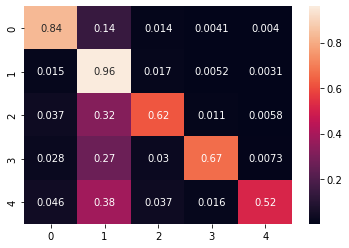

In [20]:
from sklearn.metrics import confusion_matrix
lr1_cm = confusion_matrix(test_Y, lr1_pred, normalize="true")
sns.heatmap(lr1_cm ,annot=True)
from sklearn.metrics import f1_score
print(f1_score(test_Y, lr1_pred, average='macro'))
print(classification_report(test_Y,lr1_pred))